# 1. Data fetching

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
my_df = pd.read_csv('/Users/vishalsolanki/Desktop/mv/movieRecommendation/u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])

In [3]:
movie_titles = pd.read_csv('/Users/vishalsolanki/Desktop/mv/movieRecommendation/Movie_Titles.csv',encoding= 'unicode_escape')
my_df = pd.merge(my_df, movie_titles, on='item_id')

# Step 2 - Data exploration

In [4]:
my_df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [5]:
ratings = pd.DataFrame(my_df.groupby('title')['rating'].mean())

In [6]:
ratings.head(10)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [7]:
import pickle
pickle.dump(my_df,open('names.pkl','wb'))

# 3. Creating User - Item interaction matrix

In [8]:
ratings['number_of_ratings'] = my_df.groupby('title')['rating'].count()

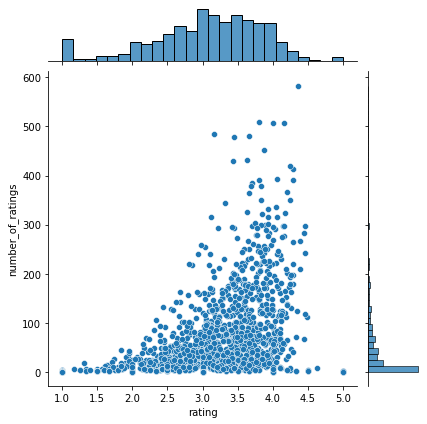

In [9]:
#Plotting the jointplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)


In [10]:
#creating the user-item interaction matrix
movie_matrix_UII = my_df.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix_UII.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0


In [11]:
#Most rated movies
ratings=ratings.sort_values('number_of_ratings', ascending=False).head(10)


In [12]:
ratings.head(10)

,rating,number_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [13]:
import pickle
pickle.dump(movie_matrix_UII,open('user_ratings.pkl','wb'))

In [14]:
pickle.dump(movie_matrix_UII.to_dict(),open('matrix_dict.pkl','wb'))

{'rating': {'Star Wars (1977)': 4.3584905660377355,
  'Contact (1997)': 3.8035363457760316,
  'Fargo (1996)': 4.155511811023622,
  'Return of the Jedi (1983)': 4.007889546351085,
  'Liar Liar (1997)': 3.156701030927835,
  'English Patient, The (1996)': 3.656964656964657,
  'Scream (1996)': 3.4414225941422596,
  'Toy Story (1995)': 3.8783185840707963,
  'Air Force One (1997)': 3.6310904872389793,
  'Independence Day (ID4) (1996)': 3.438228438228438},
 'number_of_ratings': {'Star Wars (1977)': 583,
  'Contact (1997)': 509,
  'Fargo (1996)': 508,
  'Return of the Jedi (1983)': 507,
  'Liar Liar (1997)': 485,
  'English Patient, The (1996)': 481,
  'Scream (1996)': 478,
  'Toy Story (1995)': 452,
  'Air Force One (1997)': 431,
  'Independence Day (ID4) (1996)': 429}}

# 4. Making recommendation - Example movie- FARGO

In [16]:
#Fetching ratings for Fargo
Fargo_user_rating = movie_matrix_UII['Fargo (1996)']

In [17]:
#Finding the correlation with different movies
similar_to_fargo=movie_matrix_UII.corrwith(Fargo_user_rating)

In [18]:
#Observing the result
similar_to_fargo.head()

title
'Til There Was You (1997)    0.100000
1-900 (1994)                 0.866025
101 Dalmatians (1996)       -0.245368
12 Angry Men (1957)          0.098676
187 (1997)                   0.142509
dtype: float64

# 5. Creating a threshold for minimum number of ratings

In [19]:
#creating dataframe to bring in #of ratings
corr_fargo = pd.DataFrame(similar_to_fargo, columns=['Correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [20]:
corr_fargo = corr_fargo.join(ratings['number_of_ratings'])

corr_fargo.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.100000,NaN
1-900 (1994),0.866025,NaN
101 Dalmatians (1996),-0.245368,NaN
12 Angry Men (1957),0.098676,NaN
187 (1997),0.142509,NaN


In [21]:
corr_fargo[corr_fargo['number_of_ratings'] > 30].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Fargo (1996),1.000000,508.0
Contact (1997),0.144926,509.0
Toy Story (1995),0.105460,452.0
"English Patient, The (1996)",0.098605,481.0
Return of the Jedi (1983),0.078676,507.0
Air Force One (1997),0.072000,431.0
Star Wars (1977),0.044415,583.0
Scream (1996),-0.004150,478.0
Independence Day (ID4) (1996),-0.014689,429.0
